# Energy Injection in 1D Brown Dwarf Climate Models

In this tutorial you will learn how you can add in an arbitrary amount of energy into your climate model. This could be because you want to build an intuition on the impact of temperature inversions or see if there are hot spots in your object causing variability in the observations for example. For a more in depth look at the climate-cloud code check out [Mang et al. 2026]() (note this should also be cited if using this code/tutorial).

You should be comfortable with running climate models by now, the minimum requirement for this tutorial is [One-Dimensional Climate Models: The Basics of Brown Dwarfs](https://natashabatalha.github.io/picaso/notebooks/D_climate/1_BrownDwarf_PreW.html).

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import picaso.justdoit as jdi
import picaso.justplotit as jpi
import virga.justdoit as vj
import virga.justplotit as cldplt
jpi.output_notebook()
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xarray as xr
from bokeh.plotting import show, figure
import pandas as pd

Loading BokehJS ...

## Analytical Energy Injection

In this part of the tutorial we are going to be comparing our climate models with those from [Morley et al. 2014](https://ui.adsabs.harvard.edu/abs/2014ApJ...789L..14M/abstract). We are going to test the case for a 600 K brown dwarf. To inject the energy into the atmosphere we are going to use the Chapman function to describe the profile of the energy deposition. The Chapman function is selected because it is often used
to represent heating by incident flux within molecular bands.

We are going to initiate our profile just like any other basic climate model first

In [2]:
# #1 ck tables from roxana
mh = '0.0'#'+0.0' #log metallicity
CtoO = '0.46'# # CtoO absolute ratio
ck_db = os.path.join(os.getenv('picaso_refdata'),'opacities', 'preweighted', f'sonora_2121grid_feh{mh}_co{CtoO}.hdf5')

#sonora bobcat cloud free structures file
sonora_profile_db = os.path.join(os.getenv('picaso_refdata'),'sonora_grids','bobcat')

In [3]:
cl_run = jdi.inputs(calculation="browndwarf", climate = True) # start a calculation

#note you need to put the climate keyword to be True in order to do so
# now you need to add these parameters to your calculation

teff= 600 # Effective Temperature of your Brown Dwarf in K
grav = 1000 # Gravity of your brown dwarf in m/s/s

cl_run.gravity(gravity=grav, gravity_unit=u.Unit('m/(s**2)')) # input gravity
cl_run.effective_temp(teff) # input effective temperature

opacity_ck = jdi.opannection(ck_db=ck_db,method='preweighted') # grab your opacities

In [4]:
nlevel = 91 # number of plane-parallel levels in your code

pressure_bobcat,temp_bobcat = np.loadtxt(jdi.os.path.join(
                            sonora_profile_db,f"t{teff}g{grav}nc_m0.0.cmp.gz"),
                            usecols=[1,2],unpack=True, skiprows = 1)

In [5]:
rcb_guess = 87 # top most level of guessed convective zone

# Here are some other parameters needed for the code.
rfacv = 0.0 #we are focused on a brown dwarf so let's keep this as is

In [6]:
cl_run.inputs_climate(temp_guess= temp_bobcat, pressure= pressure_bobcat,
                      rcb_guess=rcb_guess, rfacv = rfacv)

**New PICASO code parameters**:

1. `inject_energy` : (True/False) Turns on energy injection. Default = False
2. `total_energy_injection` : (float) Desired total amount of energy to be deposited in units of ergs/cm^2/s
3. `press_max_energy` : (float) Pressure for maximum energy injection in units of bars for chapman function
4. `injection_scaleheight` :  (float) Scalar specifying the number of scale heights over which energy is deposited

In [7]:
cl_run.energy_injection(inject_energy = True, total_energy_injection= 3.67e6,
                      press_max_energy = 1, injection_scalehight= 1)

In [8]:
out = cl_run.climate(opacity_ck, save_all_profiles=True,with_spec=True)

Tidal Injection is Turned on. This is your new energy profile. Pressure, tidal (erg/cm3)/s:
0.00017783 -11016635.2
0.00020869 -11016635.2
0.0002449 -11016635.16479053
0.00028739 -11016635.116308352
0.00033726 -11016635.049534524
0.00039579 -11016634.95757007
0.00046447 -11016634.830940602
0.00054506 -11016634.656584442
0.00063964 -11016634.41647697
0.00075064 -11016634.085820347
0.00088089 -11016633.630554166
0.0010337 -11016633.003874063
0.0012131 -11016632.140615804
0.0014236 -11016630.952194683
0.0016707 -11016629.315400075
0.0019606 -11016627.062539682
0.0023008 -11016623.961106015
0.0027 -11016619.692065805
0.0031685 -11016613.815335125
0.0037184 -11016605.724870019
0.0043636 -11016594.592368882
0.0051208 -11016579.271865748
0.0060094 -11016558.191598322
0.0070521 -11016529.193889063
0.0082758 -11016489.306155879
0.0097119 -11016434.450728461
0.011397 -11016359.043128863
0.013375 -11016255.371497408
0.015696 -11016112.943296656
0.018419 -11015917.390981082
0.021616 -11015648.80780

Iteration number  0 , min , max temp  178.05440326184774 2258.01935102453 , flux balance  -0.36371640839484026
Iteration number  1 , min , max temp  182.23219867974717 2266.962509990343 , flux balance  -0.3500369843859732
Iteration number  2 , min , max temp  186.25457418962415 2276.1607755996133 , flux balance  -0.3357375793822119


Iteration number  3 , min , max temp  190.13982735717403 2285.607725955654 , flux balance  -0.32080704185131004
Iteration number  4 , min , max temp  193.90372294349388 2295.2968448107345 , flux balance  -0.3052341877904854
Iteration number  5 , min , max temp  197.55983134884804 2305.2215879008195 , flux balance  -0.2890077388408398
Iteration number  6 , min , max temp  201.1198855343269 2315.3754268434377 , flux balance  -0.27211628714697234
Iteration number  7 , min , max temp  204.59405443610072 2325.751883092252 , flux balance  -0.2545482682715949
Iteration number  8 , min , max temp  207.99123041083956 2336.315826246886 , flux balance  -0.2362919459393604
Iteration number  9 , min , max temp  211.31923340950496 2347.0738962653277 , flux balance  -0.2173353978394921
Iterations exceeded it_max ! sorry 
Big iteration is  211.31923340950496 0


Iteration number  0 , min , max temp  214.58499933911236 2358.0345879172914 , flux balance  -0.19766650718359915
Iteration number  1 , min , max temp  217.79474184499009 2369.1917866492145 , flux balance  -0.17727295695767448
Iteration number  2 , min , max temp  220.95408098523635 2380.5394570193116 , flux balance  -0.15614222869689676
Iteration number  3 , min , max temp  224.0681484145246 2392.07160929132 , flux balance  -0.13426160580359808
Iteration number  4 , min , max temp  227.1417468825321 2403.7822264751467 , flux balance  -0.11161819635683135
Iteration number  5 , min , max temp  230.17950179133055 2415.6651206779834 , flux balance  -0.0881989775002811
Iteration number  6 , min , max temp  233.18612527951302 2427.6887698868104 , flux balance  -0.06399090650972268
Iteration number  7 , min , max temp  236.16700627545913 2439.8408710852314 , flux balance  -0.03898122121090535


Iteration number  8 , min , max temp  239.1303286387749 2452.13716532128 , flux balance  -0.013158576362375572
Iteration number  9 , min , max temp  240.6074930177224 2458.2904865210044 , flux balance  -1.7570441376894604e-05
Iterations exceeded it_max ! sorry 
Big iteration is  240.6074930177224 1


Iteration number  0 , min , max temp  240.6265521417385 2458.277158877199 , flux balance  -1.3253268439665553e-07
In t_start: Converged Solution in iterations  0
Profile converged before itmx


Iteration number  0 , min , max temp  241.42120164192607 2493.4823704718106 , flux balance  -0.07477209342767703
Iteration number  1 , min , max temp  242.2564257588249 2528.3352571007244 , flux balance  -0.06060806763396156
Iteration number  2 , min , max temp  243.1335915079278 2562.7773112848836 , flux balance  -0.04580810063211896
Iteration number  3 , min , max temp  244.0550383809508 2596.908850587526 , flux balance  -0.030349695632351285
Iteration number  4 , min , max temp  245.02579119216608 2630.550480279093 , flux balance  -0.01418978455159858
Iteration number  5 , min , max temp  245.89221275232055 2658.1738727139336 , flux balance  -1.6034103792100256e-05
Iteration number  6 , min , max temp  245.90525427186097 2657.773456862984 , flux balance  -1.285071583553056e-07
In t_start: Converged Solution in iterations  6
Big iteration is  245.90525427186097 0
 We are already at a root, tolf , test =  5e-05 ,  2.0395427072540126e-06
Profile converged before itmx


Move up two levels


Iteration number  0 , min , max temp  246.86089837310382 2370.235486100191 , flux balance  -2.6570557145221656e-05
Iteration number  1 , min , max temp  246.87503808926112 2370.210261689973 , flux balance  -2.020825729511743e-07
In t_start: Converged Solution in iterations  1
Big iteration is  246.87503808926112 0
 We are already at a root, tolf , test =  5e-05 ,  5.059718140823494e-07
Profile converged before itmx


Iteration number  0 , min , max temp  247.05782979106266 2328.595061259507 , flux balance  -1.113893360395449e-05
In t_start: Converged Solution in iterations  0
Big iteration is  247.05782979106266 0
 We are already at a root, tolf , test =  5e-05 ,  1.4687060967086001e-05
Profile converged before itmx


Iteration number  0 , min , max temp  247.09059932354563 2315.207937441767 , flux balance  -1.8449651798759383e-06
In t_start: Converged Solution in iterations  0
Big iteration is  247.09059932354563 0
 We are already at a root, tolf , test =  5e-05 ,  1.5865465009334767e-05
Profile converged before itmx


Iteration number  0 , min , max temp  247.09609310654784 2315.7873986962745 , flux balance  -2.6413844871284214e-07
In t_start: Converged Solution in iterations  0
Big iteration is  247.09609310654784 0
 We are already at a root, tolf , test =  5e-05 ,  1.5516350549823215e-06
Profile converged before itmx
final [0, 82, 89, 0, 0, 0]


 We are already at a root, tolf , test =  5e-05 ,  1.182409052181469e-05
Big iteration is  247.09609310654784 0
 We are already at a root, tolf , test =  5e-05 ,  1.182409052181469e-05
Profile converged before itmx
YAY ! ENDING WITH CONVERGENCE


In [9]:
# Now let's read in our benchmark profile from Morley et. al 2014
benchmark = pd.read_csv('t600g1000nc-3.67e6-h1-1bar.dat',skiprows=1, sep=r'\s+')

#we only want to compare the P-T profile so we don't care about the other columns
benchmark.columns = ['level', 'pressure', 'temperature', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6']

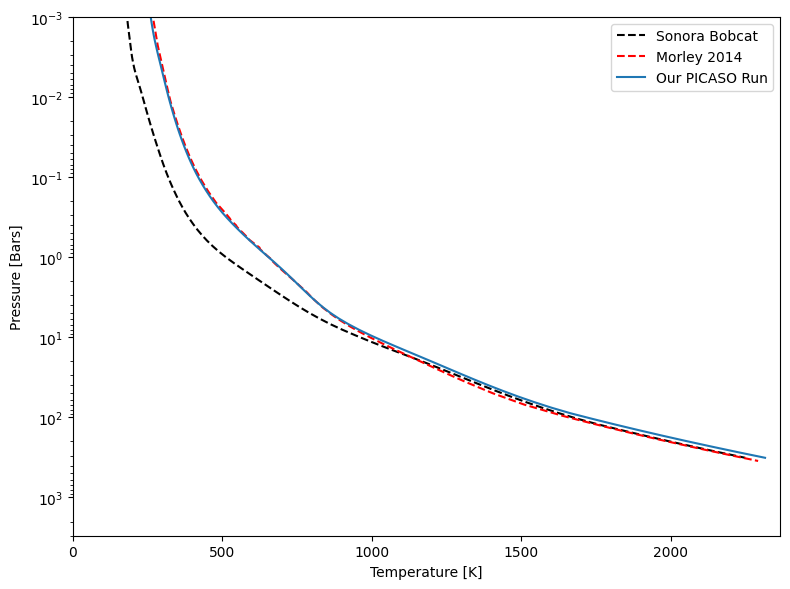

In [10]:
pressure_bobcat,temp_bobcat = np.loadtxt(jdi.os.path.join(
                            sonora_profile_db,f"t{teff}g{grav}nc_m0.0.cmp.gz"),
                            usecols=[1,2],unpack=True, skiprows = 1)
plt.figure(figsize=(8,6))
plt.ylabel("Pressure [Bars]")
plt.xlabel('Temperature [K]')
plt.xlim(0,max(out['temperature'])+50)
plt.ylim(3e3,1e-3)

plt.semilogy(temp_bobcat,pressure_bobcat,color="k",linestyle="--",label="Sonora Bobcat")
plt.semilogy(benchmark['temperature'],benchmark['pressure'],color="r",linestyle="--",label="Morley 2014")
plt.semilogy(out['temperature'],out['pressure'],label="Our PICASO Run")

plt.legend()
plt.tight_layout()
plt.show()

When you generate these models, remember that because you artificially injected energy into the atmosphere, the profile will be **warmer** than the desired effective temperature that you set for the object. You might also notice here that there are the slightest difference in the PT profile between our model and the Morley 2014 model, we're not worried about this since we ran a 91 level model compared to their 60 level model.

## Numerical Energy Injection

Let's say you don't want to use something like the Chapman function because you have an actual profile of energy deposition you'd like to include in your model. We can add a couple of other inputs to do this.

In [11]:
cl_run = jdi.inputs(calculation="browndwarf", climate = True) # start a calculation

#note you need to put the climate keyword to be True in order to do so
# now you need to add these parameters to your calculation

teff= 600 # Effective Temperature of your Brown Dwarf in K
grav = 1000 # Gravity of your brown dwarf in m/s/s

cl_run.gravity(gravity=grav, gravity_unit=u.Unit('m/(s**2)')) # input gravity
cl_run.effective_temp(teff) # input effective temperature

opacity_ck = jdi.opannection(ck_db=ck_db,method='preweighted') # grab your opacities

In [12]:
nlevel = 91 # number of plane-parallel levels in your code

pressure_bobcat,temp_bobcat = np.loadtxt(jdi.os.path.join(
                            sonora_profile_db,f"t{teff}g{grav}nc_m0.0.cmp.gz"),
                            usecols=[1,2],unpack=True, skiprows = 1)

In [13]:
rcb_guess = 87 # top most level of guessed convective zone

# Here are some other parameters needed for the code.
rfacv = 0.0 #we are focused on a brown dwarf so let's keep this as is

Here we're going to generate a Gaussian distribution of energy that will be injected into the upper atmosphere of this climate model just as an example how you can use any energy profile you'd like

In [14]:
from scipy.stats import norm

# Define the center and width of the Gaussian
center = 45  # Index for the peak of the Gaussian
width = 10    # Standard deviation of the Gaussian

# Create a Gaussian profile
beam_profile = norm.pdf(np.arange(len(pressure_bobcat)), loc=center, scale=width)

# Normalize the Gaussian to match the desired energy range
beam_profile = beam_profile / beam_profile.max() * 6e5  # Scale to the desired range

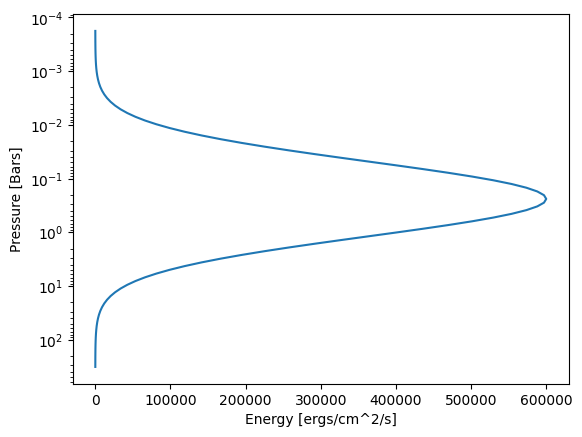

In [15]:
plt.semilogy(beam_profile, pressure_bobcat, label='Gaussian Energy Beam Profile')
plt.gca().invert_yaxis()
plt.xlabel('Energy [ergs/cm^2/s]')
plt.ylabel('Pressure [Bars]')
plt.show()

**New PICASO code parameters**:

1. `inject_beam` : (bool) Turns on using your own energy profile instead of the Chapman function
2. `beam_profile` : (array) Array of the energy profile. The shape of this array needs to be the same as the pressure grid.

In [16]:
cl_run.inputs_climate(temp_guess= temp_bobcat, pressure= pressure_bobcat,
                      rcb_guess=rcb_guess, rfacv = rfacv)
mh=1
cto_relative=1
cl_run.atmosphere(mh=mh, cto_relative=cto_relative, chem_method='visscher_1060')

cl_run.energy_injection(inject_energy = True, inject_beam = True, beam_profile = beam_profile)

In [17]:
out = cl_run.climate(opacity_ck, save_all_profiles=True,with_spec=True)

Tidal Injection is Turned on. This is your new energy profile. Pressure, tidal (erg/cm3)/s:
0.00017783 -22386324.888751347
0.00020869 -22386324.888751347
0.0002449 -22386266.93246592
0.00028739 -22386178.28308697
0.00033726 -22386044.035061307
0.00039579 -22385842.756660804
0.00046447 -22385543.982185125
0.00054506 -22385104.898936786
0.00063964 -22384466.03658015
0.00075064 -22383545.746406138
0.00088089 -22382233.246363632
0.0010337 -22380380.009534054
0.0012131 -22377789.294926602
0.0014236 -22374203.666514903
0.0016707 -22369290.42579814
0.0019606 -22362625.000595987
0.0023008 -22353672.49231513
0.0027 -22341767.786746792
0.0031685 -22326094.87669082
0.0037184 -22305666.32024327
0.0043636 -22279304.052177873
0.0051208 -22245623.056633104
0.0060094 -22203019.67002887
0.0070521 -22149666.48119768
0.0082758 -22083515.895284258
0.0097119 -22002314.39301353
0.011397 -21903629.315184444
0.013375 -21784889.60977505
0.015696 -21643441.384944446
0.018419 -21476618.32192529
0.021616 -2128182

Iteration number  0 , min , max temp  180.02278133328147 2249.4489475307887 , flux balance  -0.6929809234344015
Iteration number  1 , min , max temp  186.34822223122202 2249.5839074094833 , flux balance  -0.6926120012014338
Iteration number  2 , min , max temp  192.6287872584764 2249.7355121290307 , flux balance  -0.6921972930637508
Iteration number  3 , min , max temp  198.8346605500266 2249.9050802010984 , flux balance  -0.6917331163974603
Iteration number  4 , min , max temp  204.9492701588066 2250.0938828535286 , flux balance  -0.6912159081390434
Iteration number  5 , min , max temp  210.96504854930546 2250.3031483570553 , flux balance  -0.6906422126162899
Iteration number  6 , min , max temp  216.88015708913818 2250.534065174805 , flux balance  -0.6900086724500001
Iteration number  7 , min , max temp  222.69625726746503 2250.7877840538695 , flux balance  -0.6893120222272676
Iteration number  8 , min , max temp  228.41701572157365 2251.0654195862135 , flux balance  -0.6885490835166

Iteration number  9 , min , max temp  234.0471979686329 2251.3680513661807 , flux balance  -0.6877167608985831
Iterations exceeded it_max ! sorry 
Big iteration is  234.0471979686329 0


Iteration number  0 , min , max temp  239.59207173364427 2251.6967251800156 , flux balance  -0.6868120378235983
Iteration number  1 , min , max temp  245.0570695077836 2252.0524541674245 , flux balance  -0.685831972480807
Iteration number  2 , min , max temp  250.4475765424282 2252.4362201474023 , flux balance  -0.6847736931536706
Iteration number  3 , min , max temp  255.76882045360207 2252.8489750395183 , flux balance  -0.6836343932637762
Iteration number  4 , min , max temp  261.02581119817273 2253.2912519381634 , flux balance  -0.6824113259786017
Iteration number  5 , min , max temp  266.2233039870398 2253.7636931096918 , flux balance  -0.6811017983369195


Iteration number  6 , min , max temp  271.36579856573957 2254.2677463281148 , flux balance  -0.6797031652522675
Iteration number  7 , min , max temp  276.4575354323648 2254.8042588462936 , flux balance  -0.6782128231105088
Iteration number  8 , min , max temp  281.5025093092014 2255.3740568987573 , flux balance  -0.6766282033148253
Iteration number  9 , min , max temp  286.5044857218329 2255.9779476213566 , flux balance  -0.6749467657398908
Iterations exceeded it_max ! sorry 
Big iteration is  286.5044857218329 1


Iteration number  0 , min , max temp  291.4670057669792 2256.6167210640647 , flux balance  -0.6731659918952889
Iteration number  1 , min , max temp  296.3934119814995 2257.2911520856806 , flux balance  -0.6712833783894174
Iteration number  2 , min , max temp  301.2868540235243 2258.0020023454017 , flux balance  -0.6692964300865926
Iteration number  3 , min , max temp  306.15030923210276 2258.750022171761 , flux balance  -0.6672026535713359
Iteration number  4 , min , max temp  310.98659122990705 2259.535952464388 , flux balance  -0.6649995504784911
Iteration number  5 , min , max temp  315.7983619375306 2260.3605265194687 , flux balance  -0.6626846109918797
Iteration number  6 , min , max temp  320.58814368691964 2261.2244717882563 , flux balance  -0.6602553074806985
Iteration number  7 , min , max temp  325.35832790947774 2262.1285115896258 , flux balance  -0.6577090882102423
Iteration number  8 , min , max temp  330.11118218260503 2263.073366764027 , flux balance  -0.6550433711571515

Iteration number  9 , min , max temp  334.84886036037807 2264.059757212997 , flux balance  -0.652255538082968
Iterations exceeded it_max ! sorry 
Big iteration is  334.84886036037807 2


Iteration number  0 , min , max temp  339.5734073184169 2265.0884034013816 , flux balance  -0.6493429286426649
Iteration number  1 , min , max temp  344.28676549955827 2266.1600277532198 , flux balance  -0.6463028347194323
Iteration number  2 , min , max temp  348.9907795533963 2267.275355970361 , flux balance  -0.6431324948991833
Iteration number  3 , min , max temp  353.68720258189745 2268.435118241553 , flux balance  -0.6398290891723787
Iteration number  4 , min , max temp  358.3776995493291 2269.640050375308 , flux balance  -0.6363897337648194
Iteration number  5 , min , max temp  363.0638496221493 2270.890894852741 , flux balance  -0.6328114761035961
Iteration number  6 , min , max temp  367.74715199160886 2272.188401739175 , flux balance  -0.6290912900926005


Iteration number  7 , min , max temp  372.4290268938888 2273.5333295437995 , flux balance  -0.6252260714371323
Iteration number  8 , min , max temp  377.1108187218259 2274.926445964127 , flux balance  -0.6212126331972697
Iteration number  9 , min , max temp  381.7937999088011 2276.3685285081674 , flux balance  -0.6170477015900244
Iterations exceeded it_max ! sorry 
Big iteration is  381.7937999088011 3


Iteration number  0 , min , max temp  386.47917103925266 2277.860365071801 , flux balance  -0.6127279118131258
Iteration number  1 , min , max temp  391.1680644368116 2279.4027543720854 , flux balance  -0.6082498041792984
Iteration number  2 , min , max temp  395.8615449916507 2280.9965063143454 , flux balance  -0.6036098203319245
Iteration number  3 , min , max temp  400.56061412180344 2282.6424422233113 , flux balance  -0.5988042997486314
Iteration number  4 , min , max temp  405.2662094202691 2284.3413950394483 , flux balance  -0.5938294762353109
Iteration number  5 , min , max temp  409.97920690915834 2286.0942093842605 , flux balance  -0.5886814746941551
Iteration number  6 , min , max temp  414.7004240023871 2287.9017415285243 , flux balance  -0.5833563080684941
Iteration number  7 , min , max temp  419.4306199291407 2289.7648593054564 , flux balance  -0.5778498743423246
Iteration number  8 , min , max temp  424.17049776295755 2291.684441917755 , flux balance  -0.5721579537474203

Iteration number  9 , min , max temp  428.9207060261344 2293.6613796684355 , flux balance  -0.5662762060940878
Iterations exceeded it_max ! sorry 
Big iteration is  428.9207060261344 4


Iteration number  0 , min , max temp  433.68184040282705 2295.696573613182 , flux balance  -0.5602001682346276
Iteration number  1 , min , max temp  438.454446604925 2297.790935110814 , flux balance  -0.5539252517361202
Iteration number  2 , min , max temp  443.23901976209527 2299.9453853677273 , flux balance  -0.5474467404774517
Iteration number  3 , min , max temp  448.0360085137182 2302.16085482927 , flux balance  -0.5407597886187268
Iteration number  4 , min , max temp  452.8458149165832 2304.438282581485 , flux balance  -0.5338594184575745
Iteration number  5 , min , max temp  457.6687978469725 2306.7786156251855 , flux balance  -0.5267405185958158
Iteration number  6 , min , max temp  462.50527462859776 2309.1828081308286 , flux balance  -0.5193978420958876
Iteration number  7 , min , max temp  467.35552164175397 2311.651820656329 , flux balance  -0.5118260046849833


Iteration number  8 , min , max temp  472.21977723683614 2314.1866192795956 , flux balance  -0.5040194831665931
Iteration number  9 , min , max temp  477.0982432862157 2316.788174705705 , flux balance  -0.4959726138617968
Iterations exceeded it_max ! sorry 
Big iteration is  477.0982432862157 5


Iteration number  0 , min , max temp  481.9910870001874 2319.45746134295 , flux balance  -0.48767959111073433
Iteration number  1 , min , max temp  486.8984438564668 2322.1954563113327 , flux balance  -0.4791344659526932
Iteration number  2 , min , max temp  491.8204189224172 2325.003138466387 , flux balance  -0.4703311447436563
Iteration number  3 , min , max temp  496.7570871233573 2327.881487424233 , flux balance  -0.46126338775633513
Iteration number  4 , min , max temp  501.70849807758447 2330.8253851521004 , flux balance  -0.4519248081638173
Iteration number  5 , min , max temp  506.6746759769887 2333.835605580255 , flux balance  -0.44230887069103275
Iteration number  6 , min , max temp  511.65562233529926 2336.919107186799 , flux balance  -0.43240889052266085


Iteration number  7 , min , max temp  516.651317272841 2340.076857003553 , flux balance  -0.42221803211118425
Iteration number  8 , min , max temp  521.6617220653387 2343.309817620988 , flux balance  -0.4117293080950004
Iteration number  9 , min , max temp  526.6867799326174 2346.6189462292054 , flux balance  -0.40093557807878816
Iterations exceeded it_max ! sorry 
Big iteration is  526.6867799326174 6
Not converged


Iteration number  0 , min , max temp  531.8553096665111 2365.4484016175334 , flux balance  -0.3735390106484338
Iteration number  1 , min , max temp  584.7895876866653 2555.133641566759 , flux balance  0.11710412027474348
Iteration number  2 , min , max temp  579.8564548160366 2533.099303234426 , flux balance  0.006648101552233551
Iteration number  3 , min , max temp  579.8474830721907 2532.7156105672066 , flux balance  6.695543519824114e-05
In t_start: Converged Solution in iterations  3
Big iteration is  579.8474830721907 0


Iteration number  0 , min , max temp  579.8484023737434 2532.714668259904 , flux balance  3.9113035033525043e-07
In t_start: Converged Solution in iterations  0
Profile converged before itmx
Move up two levels


Iteration number  0 , min , max temp  577.5749342793941 2366.1494186562654 , flux balance  0.00011184663700658382
Iteration number  1 , min , max temp  577.3464837347578 2367.531764135102 , flux balance  8.899169134180645e-06
In t_start: Converged Solution in iterations  1
Big iteration is  577.3464837347578 0
 We are already at a root, tolf , test =  5e-05 ,  2.3890709934746546e-05
Profile converged before itmx


Iteration number  0 , min , max temp  580.7832457367583 2330.2836180319837 , flux balance  2.1083037062562408e-05
 We are already at a root, tolf , test =  5e-05 ,  2.318867502117102e-05
Big iteration is  580.7832457367583 0
 We are already at a root, tolf , test =  5e-05 ,  2.318867502117102e-05
Profile converged before itmx


Iteration number  0 , min , max temp  578.9123835006712 2317.30507482273 , flux balance  1.2388023082947608e-07
In t_start: Converged Solution in iterations  0
Big iteration is  578.9123835006712 0
 We are already at a root, tolf , test =  5e-05 ,  7.795086496158718e-06
Profile converged before itmx


Iteration number  0 , min , max temp  579.751777462235 2318.132170551263 , flux balance  -1.6041577874011742e-07
In t_start: Converged Solution in iterations  0
Big iteration is  579.751777462235 0
 We are already at a root, tolf , test =  5e-05 ,  1.0185425748314464e-06
Profile converged before itmx
final [0, 82, 89, 0, 0, 0]


 We are already at a root, tolf , test =  5e-05 ,  3.666060099430754e-05
Big iteration is  579.751777462235 0
 We are already at a root, tolf , test =  5e-05 ,  3.666060099430754e-05
Profile converged before itmx
YAY ! ENDING WITH CONVERGENCE


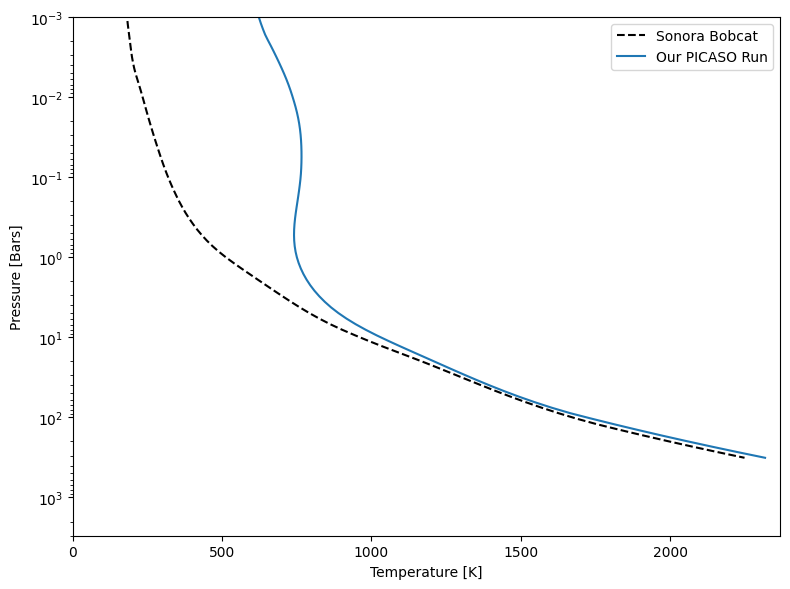

In [18]:
pressure_bobcat,temp_bobcat = np.loadtxt(jdi.os.path.join(
                            sonora_profile_db,f"t{teff}g{grav}nc_m0.0.cmp.gz"),
                            usecols=[1,2],unpack=True, skiprows = 1)
plt.figure(figsize=(8,6))
plt.ylabel("Pressure [Bars]")
plt.xlabel('Temperature [K]')
plt.xlim(0,max(out['temperature'])+50)
plt.ylim(3e3,1e-3)

plt.semilogy(temp_bobcat,pressure_bobcat,color="k",linestyle="--",label="Sonora Bobcat")
plt.semilogy(out['temperature'],out['pressure'],label="Our PICASO Run")

plt.legend()
plt.tight_layout()
plt.show()